# Trabalho BootCamp Data Science

## Grupo

*Marcelo Costalonga*

*Nicole Rachid*

## Objetivos:
  Avaliar filmes através do Bechdel Test (que avalia o papel das personagens mulheres nas narrativas através de suas interações com outros personagens), fazendo uma análise com relação a aprovação e reprovação dos filmes no teste ao longo dos anos e por categorias de filmes. Analisar também as tags mais frequentes nos filmes, procurando por alguma tendência. Avaliar a correlação entre a nota, popularidade e número de votos dos filmes e por fim, utilizar aprendizagem de máquina para treinar um modelo que tente prever o score filmes a partir de outros atributos.

## Perguntas:
 ###### 1) Quantos filmes foram aprovados e reprovados no Bechdel Test em cada ano?
 ###### 2) Quantos filmes foram aprovados e reprovados por gênero de filme?
 ###### 3) Quais são as palavras chaves (tags) mais frequentes? 
 ###### 4) Quais foram os 10 filmes mais votados e mais bem avaliados? (Analisar quais passaram ou não no teste)
 ###### 5) Aprendizado de máquina - avaliar as predições e quais atributos influenciam mais na nota do filme


## Metodologias Utilizadas:
 Árvore de Decisão e SVC para aprendizagem de máquina e uso do Regex para tratamento dos dados

### Dataset: 
https://data.world/alice-c/women-in-film  & 
         https://data.world/alice-c/women-in-film/workspace/file?filename=2010-2014+Movies+Tested.csv

In [1]:
## Começamos importando as bibliotecas desejadas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.patches as mpatches
from IPython.display import display
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn import metrics
import networkx as nx
from sklearn.decomposition import PCA
import seaborn as sns

## Lendo arquivo CSV local para um dataframe pandas
filmes = pd.read_csv('in.data/2010-2014 Movies Tested.csv')


fontTitle = {'fontname':'Times New Roman',
             'weight' : 'bold',
             'size'   : 16 }
font = {'fontname':'Times New Roman',
             'size'   : 13 }

### Análise inicial do dataset

In [2]:
print('Shape :',filmes.shape,'\n')
print(filmes.info())

Shape : (1453, 26) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 26 columns):
Movie Title                                     1453 non-null object
Passes Bechdel Test?                            1453 non-null object
Number of Criteria Passed                       1453 non-null int64
Clarity of Pass                                 920 non-null object
Has at least two [named] women in it            1453 non-null object
The women talk to each other                    1453 non-null object
The women talk about something besides a man    1453 non-null object
Genre                                           1446 non-null object
Director                                        1439 non-null object
Main Actors                                     1449 non-null object
Production Comapany                             1385 non-null object
Plot Keywords (top 10)                          1293 non-null object
Year                                          

In [3]:
import re

In [4]:
# Separando o ano do nome do título

coluna1 = filmes.values[:, 0] #pega a primeira coluna de todas as linhas
nomeFilme = [] #cria lista vazia para armazenar os nomes 

for i in range(len(coluna1)):
    #anoFilme.append((coluna1[i][-7:])[2:6])   [apagar]
    nomeFilme.append((coluna1[i])[:-7])

#Converte de lista para numpay array
nomeFilme = np.array(nomeFilme)

#Exclui coluna antiga e substitui por nova
del filmes['Movie Title'] 
filmes.insert(0,'Movie Title', nomeFilme)
filmes.head()

,Movie Title,Passes Bechdel Test?,Number of Criteria Passed,Clarity of Pass,Has at least two [named] women in it,The women talk to each other,The women talk about something besides a man,Genre,Director,Main Actors,...,Language,Country,Image,IMDb Popularity Score,Award Popularity,IMDb rating,IMDb votes,Nominations,Wins,IMDB Link
0,[REC]3 Genesis,Yes,3,Clear,Pass,Pass,Pass,Horror,Paco Plaza,"Leticia Dolera, Diego Martín, Ismael Martínez,...",...,"Spanish, Catalan, French",Spain,http://ia.media-imdb.com/images/M/MV5BNDM3OTUz...,101266.0,21,5.1,"19,856",6.0,3.0,http://www.imdb.com/title/tt1649444/
1,+1,Yes,3,Dubious,Pass,Pass,Pass,"Sci-Fi, Thriller",Dennis Iliadis,"Rhys Wakefield, Logan Miller, Ashley Hinshaw, ...",...,English,United States,http://ia.media-imdb.com/images/M/MV5BMTQwOTA5...,22693.0,NaN,5.5,"4,126",NaN,NaN,http://www.imdb.com/title/tt2395385/
2,11 Flowers,Yes,3,Dubious,Pass,Pass,Pass,Drama,Xiaoshuai Wang,"Gang Cao, Shiping Cao, Wenqing Liu, Yihao Lou",...,"Mandarin, Shanghainese","China, France",http://ia.media-imdb.com/images/M/MV5BMTQwOTYy...,2583.0,6,7.0,369,6.0,NaN,http://www.imdb.com/title/tt2042432/
3,12 Years a Slave,Yes,3,Clear,Pass,Pass,Pass,"Biography, Drama, History",Steve McQueen,"Chiwetel Ejiofor, Dwight Henry, Dickie Gravois...",...,English,"United States, United Kingdom",http://ia.media-imdb.com/images/M/MV5BMjExMTEz...,2214353.0,"1,326",8.2,"270,043",211.0,223.0,http://www.imdb.com/title/tt2024544/
4,127 Hours,Yes,3,Dubious,Pass,Pass,Pass,"Adventure, Biography, Drama",Danny Boyle,"James Franco, Kate Mara, Amber Tamblyn, Sean Bott",...,"English, Italian","United States, United Kingdom",http://ia.media-imdb.com/images/M/MV5BMTc2NjMz...,1770253.0,248,7.7,"229,903",118.0,26.0,http://www.imdb.com/title/tt1542344/


In [5]:
filmes.describe()

,Number of Criteria Passed,Year,Runtime (min),IMDb Popularity Score,IMDb rating,Nominations,Wins
count,1453.000000,1453.000000,1415.000000,1.448000e+03,1447.000000,1079.000000,892.000000
mean,2.284928,2011.813489,103.228269,3.797469e+05,6.434969,13.863763,10.122197
std,1.020465,1.328449,20.493716,7.241283e+05,1.067731,23.469970,19.820340
min,0.000000,2010.000000,3.000000,0.000000e+00,1.400000,1.000000,1.000000
25%,1.000000,2011.000000,91.000000,1.365925e+04,5.900000,2.000000,2.000000
50%,3.000000,2012.000000,101.000000,8.615500e+04,6.500000,6.000000,4.000000
75%,3.000000,2013.000000,113.000000,4.249042e+05,7.100000,14.000000,10.000000
max,3.000000,2014.000000,336.000000,9.629435e+06,9.400000,211.000000,223.000000


In [6]:
#Total de filmes produzidos em cada ano

In [7]:
bechedelEanoTot = filmes.copy()
bechedelEanoTot = bechedelEanoTot.groupby(["Year"])["Movie Title"].count()
bechedelEanoTot = bechedelEanoTot.reset_index()
bechedelEanoTot.columns = ["Year","Bechdel"]
bechedelEanoTot = bechedelEanoTot.dropna()
bechedelEanoTot.head()

,Year,Bechdel
0,2010,314
1,2011,325
2,2012,307
3,2013,332
4,2014,175


In [8]:
#Aprovações e Reprovações por Ano

In [9]:
filmesCopy = filmes.copy()
bechedelEano = filmesCopy[["Passes Bechdel Test?","Year", "Movie Title"]]
bechedelEano = bechedelEano.groupby(["Year","Passes Bechdel Test?"]).count()
bechedelEano = bechedelEano.reset_index()
bechedelEano.columns = ["Year","Bechdel","Contagem"]
bechedelEano = bechedelEano.dropna()
bechedelEano.head()

,Year,Bechdel,Contagem
0,2010,No,123
1,2010,Yes,191
2,2011,No,121
3,2011,Yes,204
4,2012,No,103


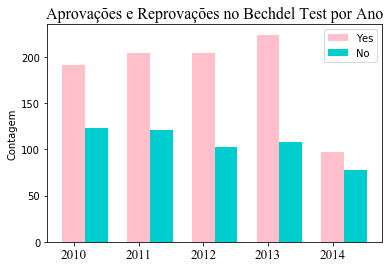

In [10]:
y = bechedelEano.values[1::2, 2] #array com contagem de aprovações em cada ano
y2 = bechedelEano.values[0::2, 2] #array com contagem de reprovações em cada ano

bar_width = 0.35

x = bechedelEano.values[:, 0]
x = np.unique(x)

x2 = []

# plot another set of bars, adjusting the new xvals to make up for the first set of bars plotted
for i in range(len(x)):
    x2.append(x[i] + bar_width)
             
        
x_labels = ['2010','2011','2012','2013','2014']

plt.figure()
plt.title("Aprovações e Reprovações no Bechdel Test por Ano", **fontTitle)
plt.ylabel('Contagem')
p1 = plt.bar(x, y, width = bar_width, color='#ffc0cb')
p2 = plt.bar(x2, y2, width = bar_width, color='#00cdcd')
_ = plt.xticks(x, x_labels, **font)
plt.legend((p1[0], p2[0]), ('Yes', 'No'))
plt.show()

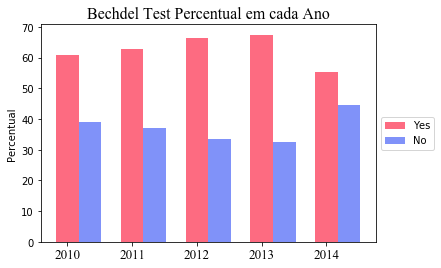

In [11]:
y1_2 = [ float('{0:.2f}'.format(100*a/b)) for a, b in zip(y, bechedelEanoTot.values[:,1])]
y2_2 = [ float('{0:.2f}'.format(100*a/b)) for a, b in zip(y2, bechedelEanoTot.values[:,1])]

plt.figure()
plt.title("Bechdel Test Percentual em cada Ano", **fontTitle) 
plt.ylabel('Percentual')
p1 = plt.bar(x, y1_2, width = bar_width, color='#fd6b81') #fffa7c
p2 = plt.bar(x2, y2_2, width = bar_width, color='#8092f9') #b3acff 
_ = plt.xticks(x, x_labels, **font)
plt.legend((p1[0], p2[0]), ('Yes', 'No'),loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [12]:
#Analise por Generos

In [13]:
generosDF = filmesCopy[["Movie Title","Genre"]]
generosDF = generosDF.dropna()

generosDF = generosDF.groupby(["Genre"]).count()

generosDF.reset_index()
generosDF.columns = ["Contagem"]

generosDF.head()

,Contagem
Genre,
Action,2
"Action, Adventure",4
"Action, Adventure, Comedy",6
"Action, Adventure, Crime",2
"Action, Adventure, Drama",11


In [14]:
filmesCopy = filmes.copy()
filmesCopy['Genre'] = filmesCopy['Genre'].astype('str') 

filmesCopy = filmesCopy.fillna(0)

todosGeneros = []
contagemGeneros = {}

# dar split em ', ' para ter generos separados
def obterGeneros(generos):
    generos = generos.split(", ")
    
    #print(type(generos))
    #print(generos)

    for genero in generos:
        if genero in contagemGeneros.keys():
            contagemGeneros[genero] = contagemGeneros[genero] + 1

        else:
            contagemGeneros[genero] = 1
        if genero not in todosGeneros:
            todosGeneros.append(genero)
            
    return todosGeneros
            
filmesCopy["Genre"] = filmesCopy["Genre"].apply(obterGeneros)

print(todosGeneros)

['Horror', 'Sci-Fi', 'Thriller', 'Drama', 'Biography', 'History', 'Adventure', 'Action', 'Family', 'Fantasy', 'Comedy', 'Romance', 'Crime', 'Documentary', 'Music', 'Sport', 'Western', 'Mystery', 'War', 'Animation', 'Musical', 'nan', 'Short']


In [15]:
print(contagemGeneros)

{'Horror': 164, 'Sci-Fi': 134, 'Thriller': 257, 'Drama': 754, 'Biography': 75, 'History': 31, 'Adventure': 191, 'Action': 258, 'Family': 78, 'Fantasy': 96, 'Comedy': 514, 'Romance': 199, 'Crime': 163, 'Documentary': 33, 'Music': 30, 'Sport': 17, 'Western': 8, 'Mystery': 94, 'War': 18, 'Animation': 97, 'Musical': 16, 'nan': 7, 'Short': 7}


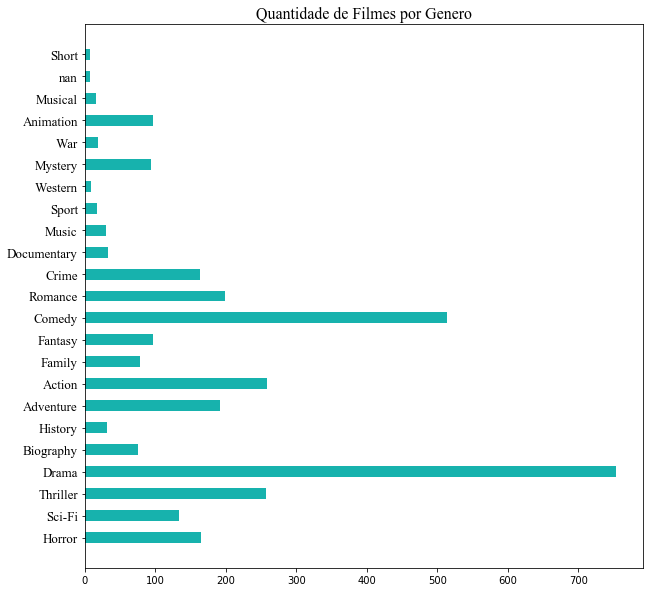

In [16]:
x_labels = list(contagemGeneros.keys())
x = range(len(x_labels))
bar_width = 0.5
y = list(contagemGeneros.values())

plt.figure(figsize=(10,10))
plt.barh(x, y, height=bar_width, color="#17b2ad")
_ = plt.yticks(x, x_labels, **font)
plt.title("Quantidade de Filmes por Genero", **fontTitle)
plt.show()

In [17]:
#Avalia Generos

#Copia as keys do dicionario contagemGeneros para outro dicionario dicContGenero_YesNO
dicContGenero_YesNo = dict.fromkeys(contagemGeneros.keys(),[0,0])

    #  Cada key desse dicionário é um genero, que está associado a um array (incialmente zerado),
    # a primeira coluna irá armazenar a quantidade de "Yes" (filmes que passaram no teste) relativos  
    # ao determinado genero, a segunda coluna faz o mesmo para "No" 

def resultadosGeneros(dicContGenero_YesNo):
    bechdelEgenero = (filmes.filter(["Movie Title","Passes Bechdel Test?","Genre"], axis=1)).copy()
    
    bechdelEgenero = bechdelEgenero[pd.isnull(bechdelEgenero.Genre) == False] 
        #OBS: numpy.isnan não funciona com Object Arrays usar pandas.isnull
    
    for i in range(len(bechdelEgenero.axes[0])):
        
        generos_do_filme = np.asarray((bechdelEgenero.iloc[i]["Genre"]).split(", ")) #guarda generos do filme em um array 
        
        resp = bechdelEgenero.iloc[i]["Passes Bechdel Test?"] #obtem Yes ou No
   
        if resp == "Yes":
            col = 0
        elif resp == "No":
            col = 1
        else:
            print("Erro no dataset, coluna - Passes Bechdel Test?")
               
        for genreName in generos_do_filme: #Para cada genero (string) dentro do array
            
            aux = np.asarray(dicContGenero_YesNo.get(genreName)) #pega o array com a contagem de Yes e No até o momento
            aux[col] += 1 #atualiza contagem do array de acordo com o valor de col (Yes - 0 e No - 1)
            dicContGenero_YesNo[genreName] = aux #atualiza dicionário  
        
    return dicContGenero_YesNo   
            
dicContGenero_YesNo = resultadosGeneros(dicContGenero_YesNo)
print(dicContGenero_YesNo)

{'Horror': array([125,  39]), 'Sci-Fi': array([76, 58]), 'Thriller': array([146, 111]), 'Drama': array([506, 248]), 'Biography': array([43, 32]), 'History': array([23,  8]), 'Adventure': array([108,  83]), 'Action': array([119, 139]), 'Family': array([63, 15]), 'Fantasy': array([63, 33]), 'Comedy': array([326, 188]), 'Romance': array([149,  50]), 'Crime': array([79, 84]), 'Documentary': array([19, 14]), 'Music': array([20, 10]), 'Sport': array([ 7, 10]), 'Western': array([1, 7]), 'Mystery': array([63, 31]), 'War': array([ 7, 11]), 'Animation': array([59, 38]), 'Musical': array([13,  3]), 'nan': [0, 0], 'Short': array([2, 5])}


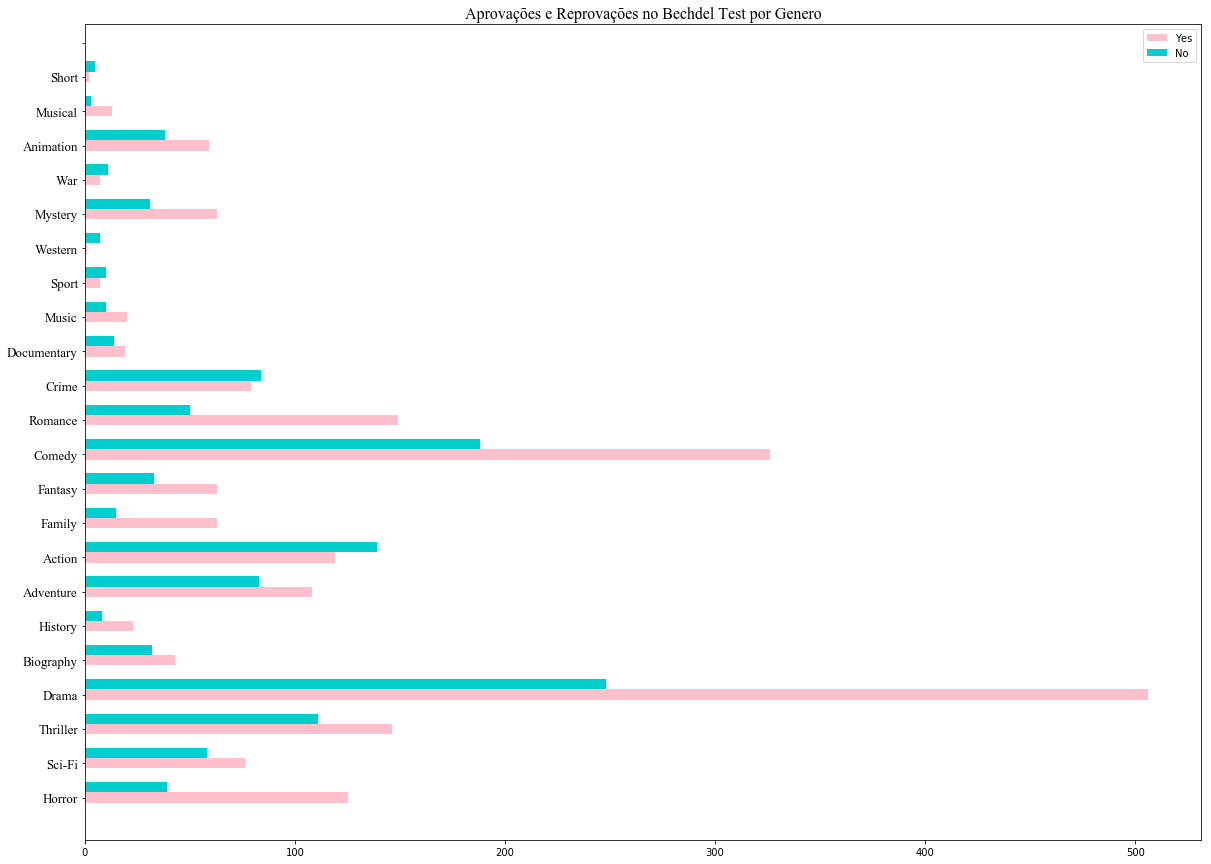

In [18]:
dicContGenero_YesNo.pop('nan', None) #removendo o genero 'nan', que não foi utilizado, do dicionário

bar_width = 0.30

x_labels = list(dicContGenero_YesNo.keys())
x1 = range(len(x_labels))

x2 = []
for i in range(len(x1)):
    x2.append(x1[i] + bar_width)

y1 = [] #Yes
y2 = [] #No
ytot = [] #quantidade total em cada genero
for temp in list(dicContGenero_YesNo.values()):
    y1.append(temp[0])
    y2.append(temp[1])
    ytot.append(temp[0]+temp[1])
    
plt.figure(figsize=(20,15))
plt.title("Aprovações e Reprovações no Bechdel Test por Genero", **fontTitle)
#plt.ylabel('Generos')
p1 = plt.barh(x1, y1, height = bar_width, color='#ffc0cb')
p2 = plt.barh(x2, y2, height = bar_width, color='#00cdcd')
_ = plt.yticks(x, x_labels, **font)
plt.legend((p1[0], p2[0]), ('Yes', 'No'))
plt.show()

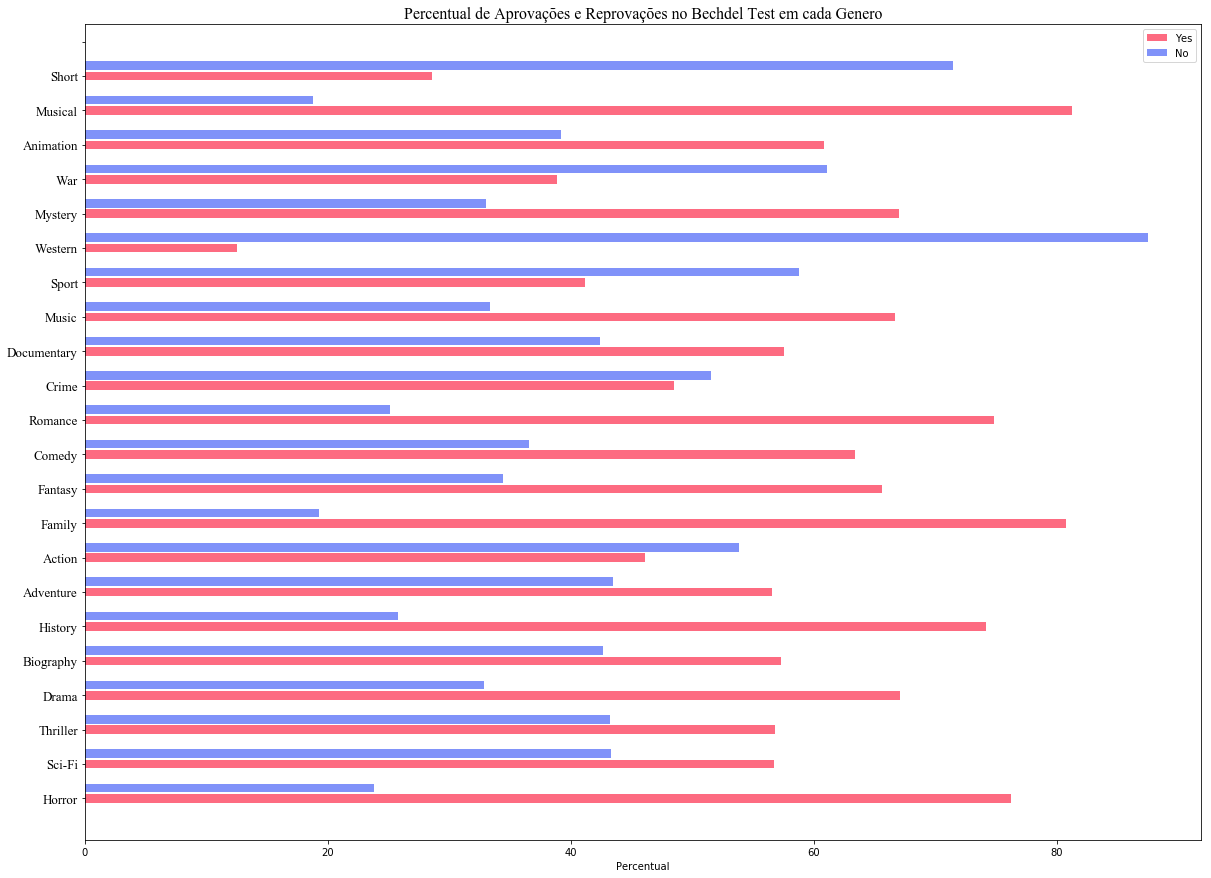

In [19]:
y1_2 = [ float('{0:.2f}'.format(100*a/b)) for a, b in zip(y1, ytot)]
y2_2 = [ float('{0:.2f}'.format(100*a/b)) for a, b in zip(y2, ytot)]

bar_width = 0.25

plt.figure(figsize=(20,15))
plt.title("Percentual de Aprovações e Reprovações no Bechdel Test em cada Genero", **fontTitle)
#plt.ylabel('Generos') 
plt.xlabel("Percentual")
p1 = plt.barh(x1, y1_2, height = bar_width, color = '#fd6b81') #fffa7c  #d41f3a  #fd6b81
p2 = plt.barh(x2, y2_2, height = bar_width, color = '#8092f9') #b3acff  #6e7ccc  #8092f9
_ = plt.yticks(x, x_labels, **font)

'''
Para alterar as cores de 2 em 2 barras para deixar mais distinto 
for i in range(len(x_labels)):
    if (i%2) == 0:
        p1[i].set_color('#a52a4f')
        p2[i].set_color('#043ea7')
    else:
        p1[i].set_color('#ff0052')
        p2[i].set_color('#2abbec')
'''       
plt.legend((p1[0], p2[0]), ('Yes', 'No'))
plt.show()

## Avaliação de Tags

In [20]:
def obterTags():
    Tags = (filmes.filter(["Plot Keywords (top 10)"], axis=1)).copy()
    Tags = Tags.dropna()
    
    todasTags = []
    dicTags = {}
    
    for i in range(len(Tags.axes[0])):
        
        tags_do_filme = np.asarray((Tags.iloc[i]["Plot Keywords (top 10)"]).split(", ")) 
               
        for tag in tags_do_filme: 
            if tag in dicTags.keys():
                dicTags[tag] += 1
            else:
                dicTags[tag] = 1 #adiciona uma nova tag como key do dicionario e inicializa sua contagem
                
            if tag not in todasTags:
                todasTags.append(tag)
    return dicTags, todasTags
            
dicTags, todasTags = obterTags()

def retornaMaior (dicTags):
    maior = 0
    for i in dicTags:             
        if dicTags[i] > maior:
            maior = dicTags[i]
            topTag = i
    return topTag


from copy import deepcopy

dicAux = deepcopy(dicTags)
maiores = []
for i in range(20):
    tagMaior = retornaMaior(dicAux)
    maiores.append((tagMaior, dicAux[tagMaior]))
    dicAux[tagMaior] = -1
    
print(maiores)

[('love', 67), ('murder', 63), ('death', 59), ('revenge', 42), ('friendship', 40), ('friend', 37), ('high school', 35), ('party', 34), ('female protagonist', 33), ('police', 32), ('fight', 32), ('escape', 31), ('two word title', 30), ('female nudity', 29), ('new york city', 29), ('wedding', 28), ('father son relationship', 28), ('boy', 28), ('teenager', 28), ('one word title', 27)]


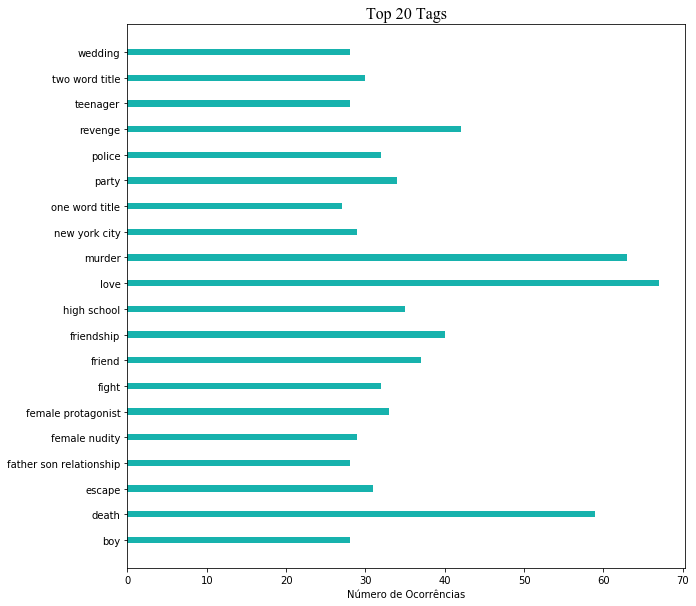

In [21]:
fig, ax1 = plt.subplots(figsize=(10,10))

maiores_tag = [nome for nome, _ in maiores] #pega todas as tags (linhas da primeira coluna) 
maiores_count = [count for _, count in maiores] #pega todas as contagens (linhas da segunda coluna)

ax1.barh(maiores_tag, maiores_count, height = bar_width, color='#17b2ad')
ax1.set_title("Top 20 Tags", **fontTitle)
#plt.ylabel("Tags",**font)
plt.xlabel("Número de Ocorrências")
plt.show()

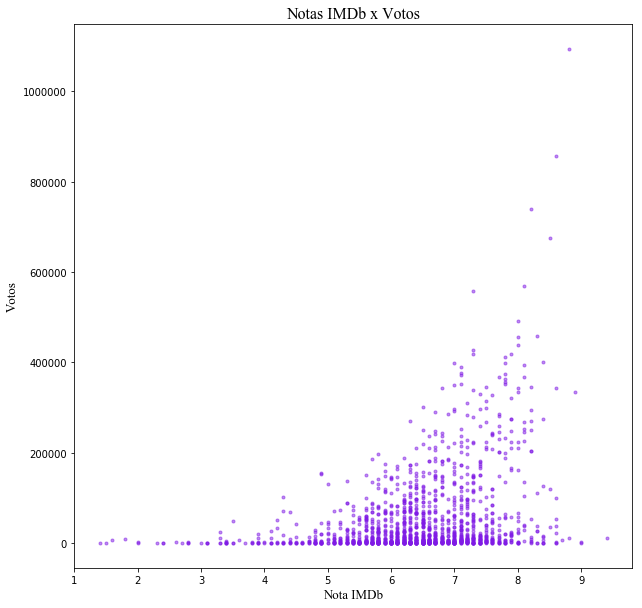

In [22]:
df = filmes.copy()
df['IMDb votes'] = df['IMDb votes'].astype(str).str.replace('\D+', '') 
    #trata a coluna do tipo object como string, removendo as virgulas dos numeros maiores que 1000

df['IMDb votes'] = pd.to_numeric(df['IMDb votes']).fillna(0).astype(np.int64) #converte todo o Series de string para float e depois para int
y = df['IMDb votes']
x = df['IMDb rating']

fig, ax1 = plt.subplots(figsize=(10,10))

ax1.scatter(x, y, alpha=0.5, marker='.', color='#7f1ae5')
ax1.set_title('Notas IMDb x Votos',**fontTitle)
plt.xlabel('Nota IMDb',**font)
plt.ylabel('Votos',**font)
plt.show()

In [23]:
top10_votos_contagem = df['IMDb votes'].sort_values(ascending=False).head(10) #obtem os 10 filmes mais votados em ordem decrescente
indAux = top10_votos_contagem.index.values #indices no dataframe dos 10 filmes mais votados   
top10_votos_nome = [(df.loc[a])['Movie Title'] for a in indAux]
       
dicVotos = dict(zip(top10_votos_nome, top10_votos_contagem))
print(dicVotos) #dicionario com nome : votos dos 10 filmes mais votados 

{'Inception': 1094254, 'The Dark Knight Rises': 857266, 'The Avengers': 739786, 'Django Unchained': 675509, 'Shutter Island': 568722, 'The Hunger Games': 559295, 'The Hobbit: An Unexpected Journey': 490726, 'The Wolf of Wall Street': 459484, 'Black Swan': 456208, 'Gravity': 439349}


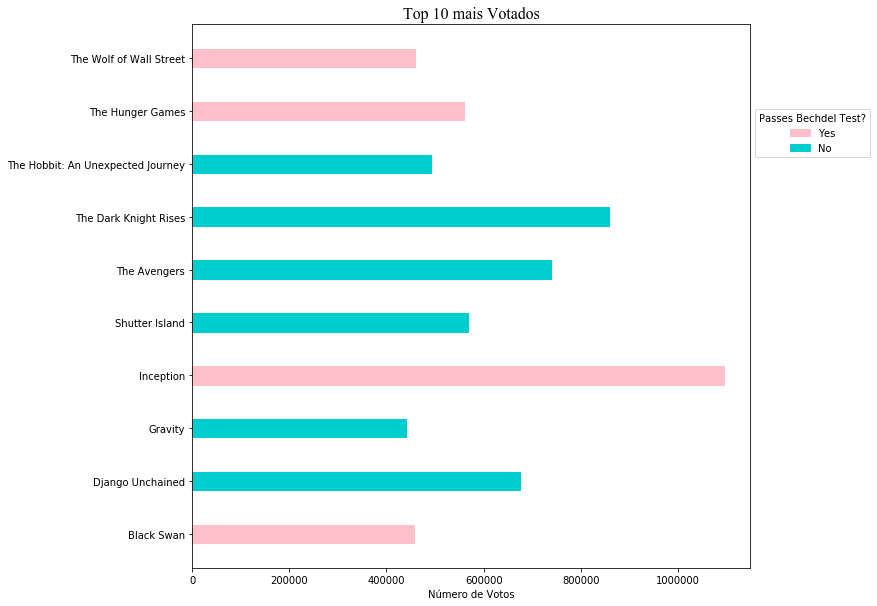

In [24]:
fig, ax1 = plt.subplots(figsize=(10,10))
bar_width = 0.35

barlist = ax1.barh(top10_votos_nome, top10_votos_contagem, height = bar_width)

for i in range(len(indAux)):
    linha = indAux[i]
    resp = (df.loc[linha])['Passes Bechdel Test?']
    if resp == "Yes":
        barlist[i].set_color('#ffc0cb')#b30e50
    else:
        barlist[i].set_color('#00cdcd')

ax1.set_title("Top 10 mais Votados", **fontTitle)
plt.xlabel("Número de Votos")
plt.legend((barlist[0], barlist[1]), ('Yes', 'No'), title = 'Passes Bechdel Test?', loc='center left', bbox_to_anchor=(1, 0.8))
plt.show()

In [25]:
top10_rating_contagem = df['IMDb rating'].sort_values(ascending=False).head(10) #obtem o top 10 de rating em ordem decrescente
indAux = top10_rating_contagem.index.values #indices no dataframe dos 10 filmes com maior rating   
top10_rating_nome = [(df.loc[a])['Movie Title'] for a in indAux]
       
dicRating = dict(zip(top10_rating_nome, top10_rating_contagem))
print(dicRating) #dicionario com nome : rating dos 10 filmes com maior rating 

{'The Day of the Doctor': 9.4000000000000004, 'Moving Mountains': 9.0, 'The Lizzie Bennet Diaries': 9.0, 'Interstellar': 8.9000000000000004, 'Birdman': 8.8000000000000007, 'Inception': 8.8000000000000007, 'Whiplash': 8.6999999999999993, 'Lies I Told My Little Sister': 8.5999999999999996, 'Untouchable': 8.5999999999999996, 'Hannibal': 8.5999999999999996}


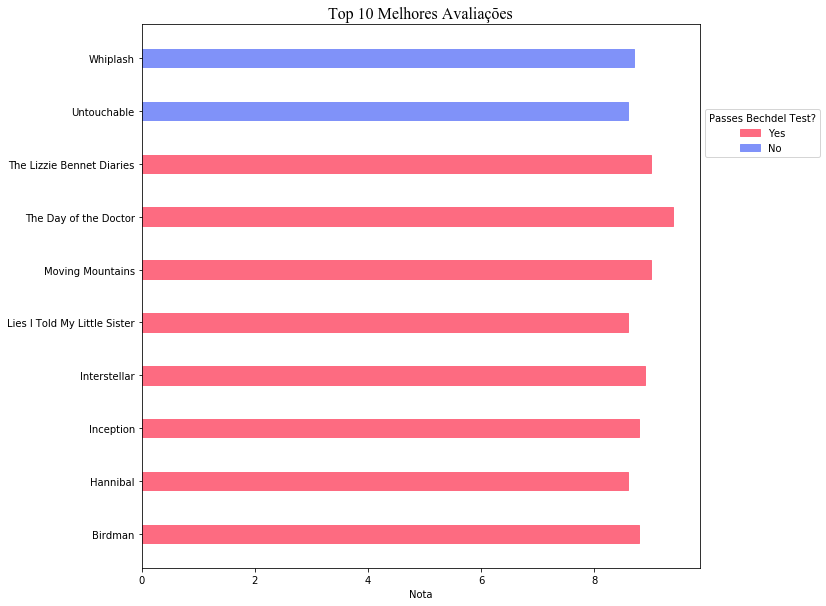

In [26]:
fig, ax1 = plt.subplots(figsize=(10,10))
bar_width = 0.35

barlist = ax1.barh(top10_rating_nome, top10_rating_contagem, height = bar_width)

for i in range(len(indAux)):
    linha = indAux[i]
    resp = (df.loc[linha])['Passes Bechdel Test?']
    if resp == "Yes":
        barlist[i].set_color('#fd6b81')
        ok = i
    else:
        barlist[i].set_color('#8092f9')
        Nok = i

ax1.set_title("Top 10 Melhores Avaliações", **fontTitle)
plt.xlabel("Nota")
plt.legend((barlist[ok], barlist[Nok]), ('Yes', 'No'), title = 'Passes Bechdel Test?', loc='center left', bbox_to_anchor=(1, 0.8))
plt.show()

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 26 columns):
Movie Title                                     1453 non-null object
Passes Bechdel Test?                            1453 non-null object
Number of Criteria Passed                       1453 non-null int64
Clarity of Pass                                 920 non-null object
Has at least two [named] women in it            1453 non-null object
The women talk to each other                    1453 non-null object
The women talk about something besides a man    1453 non-null object
Genre                                           1446 non-null object
Director                                        1439 non-null object
Main Actors                                     1449 non-null object
Production Comapany                             1385 non-null object
Plot Keywords (top 10)                          1293 non-null object
Year                                            1453 non-null int64

## Análise entre Votos, Nota e Popularity Score dos filmes

In [28]:
data2 = (filmes.filter(["Number of Criteria Passed","Year","Genre","Runtime (min)",
                        "IMDb Popularity Score","IMDb rating","Nominations","Wins"], axis=1)).copy()

data2 = data2.drop(['Wins','Nominations','Genre'], 1)
df2 = df[['IMDb votes']]
df3 = df[['IMDb rating']]
df2.describe()

,IMDb votes
count,1.453000e+03
mean,5.368790e+04
std,9.341434e+04
min,0.000000e+00
25%,2.200000e+03
50%,1.317100e+04
75%,6.528800e+04
max,1.094254e+06


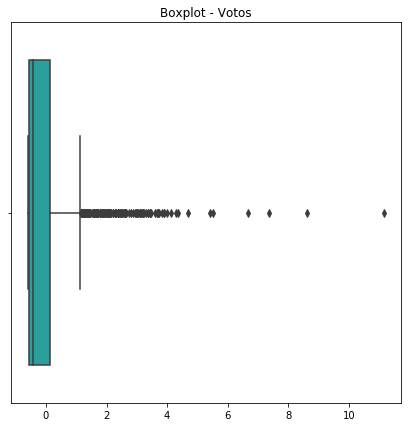

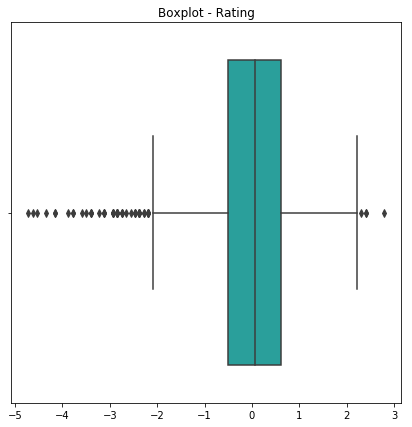

In [69]:
#Padronização
fig = plt.figure(figsize=(7,7))
df2 = (df2 - df2.mean())/df2.std()
df3 = (df3 - df3.mean())/df3.std()
sns.boxplot(y=df2, orient='h', color='#17b2ad')
plt.title('Boxplot - Votos')
plt.show()
fig = plt.figure(figsize=(7,7))
sns.boxplot(y=df3, orient='h', color='#17b2ad')
plt.title('Boxplot - Rating')
plt.show()

In [30]:
#fig = plt.figure(figsize=(7,7))
#sns.regplot(x=df2, y=df3, fit_reg=False, color='#7f1ae5', scatter_kws={'alpha':0.25})
#plt.show()

## Correlação

In [71]:
from scipy.stats.stats import spearmanr  
df2.dropna()
#df
spearmanr(df2,df3,nan_policy = 'omit')[0]

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\mstats_basic.py:484: RuntimeWarning: overflow encountered in long_scalars
  denom = n*(n**2 - 1)/6.


2.6711918781823139

In [32]:
df_two_columns = df[['IMDb votes', 'IMDb rating','IMDb Popularity Score']]
df_two_columns.corr()

,IMDb votes,IMDb rating,IMDb Popularity Score
IMDb votes,1.000000,0.331596,0.993239
IMDb rating,0.331596,1.000000,0.356155
IMDb Popularity Score,0.993239,0.356155,1.000000


In [33]:
df_two_columns.corr(method = 'spearman')

,IMDb votes,IMDb rating,IMDb Popularity Score
IMDb votes,1.000000,0.301703,0.997513
IMDb rating,0.301703,1.000000,0.356256
IMDb Popularity Score,0.997513,0.356256,1.000000


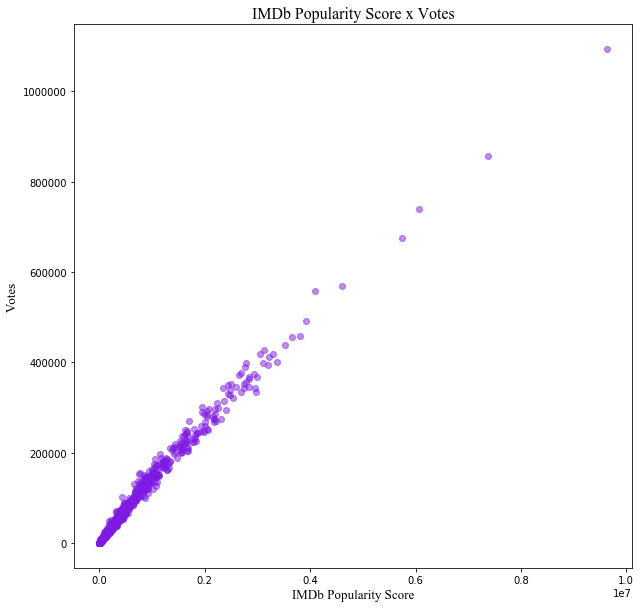

In [72]:
#df2 = df[['IMDb votes']]
df4 = df[['IMDb Popularity Score']]
df4 = (df4 - df4.mean())/df4.std()

#df = filmes.copy()
#df['IMDb votes'] = df['IMDb votes'].astype(str).str.replace('\D+', '') 
    #trata a coluna do tipo object como string, removendo as virgulas dos numeros maiores que 1000

df['IMDb votes'] = pd.to_numeric(df['IMDb votes']).fillna(0).astype(np.int64) #converte todo o Series de string para float e depois para int
y = df['IMDb votes']
x = df['IMDb Popularity Score']

fig, ax1 = plt.subplots(figsize=(10,10))

ax1.scatter(x, y, alpha=0.5, marker='o', color='#7f1ae5')
ax1.set_title('IMDb Popularity Score x Votes',**fontTitle)
plt.xlabel('IMDb Popularity Score',**font)
plt.ylabel('Votes',**font)
plt.show()


### Processo de adaptação dos dados  

In [35]:
#Escolhendo os dados relevantes para o treinamento
dfNovo = df.drop(['IMDB Link','Wins','Nominations','Image', 'Plot',
                 'Movie Title','Rating','Award Popularity'], axis=1)

In [36]:
filmesCopy2 = dfNovo.copy()

filmesCopy2['Director'] = filmesCopy2['Director'].astype('str') 
filmesCopy2['Main Actors'] = filmesCopy2['Main Actors'].astype('str')
filmesCopy2['Language'] = filmesCopy2['Language'].astype('str') 
filmesCopy2['Country'] = filmesCopy2['Country'].astype('str') 
filmesCopy2['Plot Keywords (top 10)'] = filmesCopy2['Plot Keywords (top 10)'].astype('str') 
filmesCopy2['Production Comapany'] = filmesCopy2['Production Comapany'].astype('str') 

filmesCopy2 = filmesCopy2.fillna(0)

#Transforma atributos separados por virgulas como Language, Diretores, Countrys... em listas de strings
#Usando o Regex para tratar de caracteres especiais
todasColunas = []

def obterTodasColunas(texto):
    texto = str(texto).split(", ")
    for palavra in texto:
        palavra = re.sub("[@|#|“|”|’|‘|®|!|?||\[|\]|\"|%|:|\-|_|/|ª|\(|\)|°|\*|🇧|🇷|\'|️|=]",'', palavra)
        palavra = re.sub("[0-9]+", '', palavra) #numbers
        if palavra not in todasColunas:
            todasColunas.append(palavra)
    if 'nan' in todasColunas : todasColunas.remove('nan')
    elif 'NaN' in todasColunas : todasColunas.remove('NaN')
    return todasColunas

filmesCopy2["Director"] = filmesCopy2["Director"].apply(obterTodasColunas)
todosDiretores = todasColunas.copy()

todasColunas = []
filmesCopy2["Main Actors"] = filmesCopy2["Main Actors"].apply(obterTodasColunas)
todosAtores = todasColunas.copy()

todasColunas = []
filmesCopy2["Language"] = filmesCopy2["Language"].apply(obterTodasColunas)
todosLinguas = todasColunas.copy()

todasColunas = []
filmesCopy2["Country"] = filmesCopy2["Country"].apply(obterTodasColunas)
todosPaises = todasColunas.copy()

todasColunas = []
filmesCopy2["Plot Keywords (top 10)"] = filmesCopy2["Plot Keywords (top 10)"].apply(obterTodasColunas)
todosWords = todasColunas.copy()

todasColunas = []
filmesCopy2["Production Comapany"] = filmesCopy2["Production Comapany"].apply(obterTodasColunas)
todosCompany = todasColunas.copy()



In [37]:
print(len(todosDiretores), '\tDirector') #Director
print(len(todosAtores), '\tMain Actors') #Main Actors
print(len(todosLinguas), '\tLanguage') #Language
print(len(todosPaises), '\tCountry') #Country
print(len(todosWords), '\tPlot Keywords (top 10)') #Plot Keywords (top 10)
print(len(todosCompany), '\tProduction Comapany') #Production Comapany

1349 	Director
4059 	Main Actors
85 	Language
76 	Country
6035 	Plot Keywords (top 10)
1852 	Production Comapany


In [38]:
if 'nan' in todosGeneros : todosGeneros.remove('nan')
print(todosGeneros)

['Horror', 'Sci-Fi', 'Thriller', 'Drama', 'Biography', 'History', 'Adventure', 'Action', 'Family', 'Fantasy', 'Comedy', 'Romance', 'Crime', 'Documentary', 'Music', 'Sport', 'Western', 'Mystery', 'War', 'Animation', 'Musical', 'Short']


In [39]:
a = np.zeros(shape=(len(filmesCopy),len(todosGeneros)))
generos = dfNovo['Genre'].dropna()

for i, generos in generos.iteritems():
    generos = str(generos).split(", ")
    for genero in generos:
        indexToIncrement = todosGeneros.index(genero)
        a[i, indexToIncrement] += 1

dfSumGenresByMovie = pd.DataFrame(a, columns=todosGeneros)
dfSumGenresByMovie.head()

,Horror,Sci-Fi,Thriller,Drama,Biography,History,Adventure,Action,Family,Fantasy,...,Crime,Documentary,Music,Sport,Western,Mystery,War,Animation,Musical,Short
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
a = np.zeros(shape=(len(filmesCopy),len(todosDiretores)))
itens = dfNovo['Director'].dropna()

for i, itens in itens.iteritems():
    itens = str(itens).split(", ")
    for item in itens:
        item = re.sub("[@|#|“|”|’|‘|®|!|?||\[|\]|\"|%|:|\-|_|/|ª|\(|\)|°|\*|🇧|🇷|\'|️|=]",'', item)
        item = re.sub("[0-9]+", '', item) #numbers
        indexToIncrement = todosDiretores.index(item)
        a[i, indexToIncrement] += 1

dfSumDirectorsByMovie = pd.DataFrame(a, columns=todosDiretores)
dfSumDirectorsByMovie.head()

,Paco Plaza,Dennis Iliadis,Xiaoshuai Wang,Steve McQueen,Danny Boyle,Takashi Miike,Peter DeLuise,Delphine Coulin,Muriel Coulin,T.C. Christensen,...,Jesse Holland,Andy Mitton,Herman Yau,Eric Brevig,Jason Reitman,Jalil Lespert,Kathryn Bigelow,Oskar Santos,K. King,Denis Dercourt
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
a = np.zeros(shape=(len(filmesCopy),len(todosAtores)))
itens = dfNovo['Main Actors'].dropna()

for i, itens in itens.iteritems():
    itens = str(itens).split(", ")
    for item in itens:
        item = re.sub("[@|#|“|”|’|‘|®|!|?||\[|\]|\"|%|:|\-|_|/|ª|\(|\)|°|\*|🇧|🇷|\'|️|=]",'', item)
        item = re.sub("[0-9]+", '', item) #numbers
        indexToIncrement = todosAtores.index(item)
        a[i, indexToIncrement] += 1

dfSumActorsByMovie = pd.DataFrame(a, columns=todosAtores)
dfSumActorsByMovie.head()

,Leticia Dolera,Diego Martín,Ismael Martínez,Àlex Monner,Rhys Wakefield,Logan Miller,Ashley Hinshaw,Natalie Hall,Gang Cao,Shiping Cao,...,Kyle Chandler,Javier Gutiérrez,Raúl Rivas,Daniel Cerezo,Martin Copping,Clare Niederpruem,Jason K. Wixom,Mark Waschke,Marie Bäumer,Sophie Rois
0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
a = np.zeros(shape=(len(filmesCopy),len(todosLinguas)))
itens = dfNovo['Language'].dropna()

for i, itens in itens.iteritems():
    itens = str(itens).split(", ")
    for item in itens:
        item = re.sub("[@|#|“|”|’|‘|®|!|?||\[|\]|\"|%|:|\-|_|/|ª|\(|\)|°|\*|🇧|🇷|\'|️|=]",'', item)
        item = re.sub("[0-9]+", '', item) #numbers
        indexToIncrement = todosLinguas.index(item)
        a[i, indexToIncrement] += 1

dfSumLanguagesByMovie = pd.DataFrame(a, columns=todosLinguas)
dfSumLanguagesByMovie.head()

,Spanish,Catalan,French,English,Mandarin,Shanghainese,Italian,Japanese,Gallegan,Macedonian,...,Filipino,Irish,Tagalog,North American Indian,Georgian,Dyula,Sanskrit,Aboriginal,Rajasthani,Lingala
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
a = np.zeros(shape=(len(filmesCopy),len(todosWords)))
itens = dfNovo['Plot Keywords (top 10)'].dropna()

for i, itens in itens.iteritems():
    itens = str(itens).split(", ")
    for item in itens:
        item = re.sub("[@|#|“|”|’|‘|®|!|?||\[|\]|\"|%|:|\-|_|/|ª|\(|\)|°|\*|🇧|🇷|\'|️|=]",'', item)
        item = re.sub("[0-9]+", '', item) #numbers
        indexToIncrement = todosWords.index(item)
        a[i, indexToIncrement] += 1

dfSumWordsByMovie = pd.DataFrame(a, columns=todosWords)
dfSumWordsByMovie.head()

,wedding,infection,church,third part,female stockinged sole,pantyhose,foot closeup,camera shot of feet,female stockinged foot,pregnant woman murdered,...,suspected pregnancy,sex with condom,algerian war,morocco,man in swimsuit,manic depression,drug abuse,al qaeda,osama bin laden,woman spy
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
a = np.zeros(shape=(len(filmesCopy),len(todosPaises)))
itens = dfNovo['Country'].dropna()

for i, itens in itens.iteritems():
    itens = str(itens).split(", ")
    for item in itens:
        item = re.sub("[@|#|“|”|’|‘|®|!|?||\[|\]|\"|%|:|\-|_|/|ª|\(|\)|°|\*|🇧|🇷|\'|️|=]",'', item)
        item = re.sub("[0-9]+", '', item) #numbers
        indexToIncrement = todosPaises.index(item)
        a[i, indexToIncrement] += 1

dfSumCountrysByMovie = pd.DataFrame(a, columns=todosPaises)
dfSumCountrysByMovie.head()

,Spain,United States,China,France,United Kingdom,Japan,Canada,Argentina,Germany,Belgium,...,Pakistan,Malaysia,Bahamas,Puerto Rico,Albania,Burkina Faso,Lebanon,Colombia,Democratic Republic Of Congo,Malta
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
a = np.zeros(shape=(len(filmesCopy),len(todosCompany)))
itens = dfNovo['Production Comapany'].dropna()

for i, itens in itens.iteritems():
    itens = str(itens).split(", ")
    for item in itens:
        item = re.sub("[@|#|“|”|’|‘|®|!|?||\[|\]|\"|%|:|\-|_|/|ª|\(|\)|°|\*|🇧|🇷|\'|️|=]",'', item)
        item = re.sub("[0-9]+", '', item) #numbers
        indexToIncrement = todosCompany.index(item)
        a[i, indexToIncrement] += 1

dfSumCompanyByMovie = pd.DataFrame(a, columns=todosCompany)
dfSumCompanyByMovie.head()

,Canal+ España,Filmax,Generalitat de Catalunya Institut Català de les Indústries Culturals ICIC,Process Films,Process Media,Regency Enterprises,River Road Entertainment,Plan B Entertainment,Twentieth Century Fox,Pathé,...,Denver and Delilah Productions,Ada Films,Wy Productions,Cinéfrance,First Light Production,Zeta Audiovisual,Klimax,Busse & Halberschmidt,Cité Films,Kineo Filmproduktion Peter Hartwig
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
from functools import reduce

#OBS: functools.reduce() equivale à fazer:
'''
    df_final1 = dfNovo.merge(dfSumGenresByMovie, how='inner', left_index=True, right_index=True)
    df_final2 = df_final1.merge(dfSumLanguagesByMovie, how='inner', left_index=True, right_index=True)
    df_final3 = df_final2.merge(dfSumCountrysByMovie, how='inner', left_index=True, right_index=True)
    df_final4 = df_final3.merge(dfSumDirectorsByMovie, how='inner', left_index=True, right_index=True)
    df_final5 = df_final4.merge(dfSumActorsByMovie, how='inner', left_index=True, right_index=True)
    df_final6 = df_final5.merge(dfSumWordsByMovie, how='inner', left_index=True, right_index=True)
    df_final7 = df_final6.merge(dfSumCompanyByMovie, how='inner', left_index=True, right_index=True)
    df_final7.shape
'''
dfs = [dfNovo, 
       dfSumCompanyByMovie,
       dfSumLanguagesByMovie,
       dfSumWordsByMovie,
       dfSumActorsByMovie,
       dfSumDirectorsByMovie,
       dfSumCountrysByMovie,
       dfSumGenresByMovie]

df_final = reduce(lambda left,right: pd.merge(left, right, how='inner', left_index=True, right_index=True), dfs)

df_final = df_final.drop(['Clarity of Pass','Passes Bechdel Test?', 'Has at least two [named] women in it',
                          'The women talk to each other', 'The women talk about something besides a man',
                          'Number of Criteria Passed'],axis=1)

df_final.head()

,Genre,Director,Main Actors,Production Comapany,Plot Keywords (top 10),Year,Runtime (min),Language,Country,IMDb Popularity Score,...,Crime,Documentary,Music,Sport,Western,Mystery,War,Animation,Musical,Short
0,Horror,Paco Plaza,"Leticia Dolera, Diego Martín, Ismael Martínez,...","Canal+ España, Filmax, Generalitat de Cataluny...","wedding, infection, church, third part, female...",2012,80.0,"Spanish, Catalan, French",Spain,101266.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"Sci-Fi, Thriller",Dennis Iliadis,"Rhys Wakefield, Logan Miller, Ashley Hinshaw, ...","Process Films, Process Media","party, college, hero kills a woman, woman stab...",2013,95.0,English,United States,22693.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Drama,Xiaoshuai Wang,"Gang Cao, Shiping Cao, Wenqing Liu, Yihao Lou",NaN,"childhood friend, pregnant from rape, sentence...",2011,110.0,"Mandarin, Shanghainese","China, France",2583.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"Biography, Drama, History",Steve McQueen,"Chiwetel Ejiofor, Dwight Henry, Dickie Gravois...","Regency Enterprises, River Road Entertainment,...","slave, physical abuse, male frontal nudity, ma...",2013,134.0,English,"United States, United Kingdom",2214353.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"Adventure, Biography, Drama",Danny Boyle,"James Franco, Kate Mara, Amber Tamblyn, Sean Bott","Twentieth Century Fox, Pathé, Everest Entertai...","aron ralston, based on autobiography, canyon, ...",2010,94.0,"English, Italian","United States, United Kingdom",1770253.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
#Removendo colunas antigas
df_final = df_final.drop(['Genre','Main Actors', 'Language', 'Country', 'Plot Keywords (top 10)', 
               'Director', 'Production Comapany'], axis=1)

In [48]:
#Aplicar o dummies para separar atributos categoricos
df_with_dummies = pd.get_dummies(df_final)
df_with_dummies = df_with_dummies.dropna()
df_with_dummies.head()

,Year,Runtime (min),IMDb Popularity Score,IMDb rating,IMDb votes,Canal+ España,Filmax,Generalitat de Catalunya Institut Català de les Indústries Culturals ICIC,Process Films,Process Media,...,Crime,Documentary,Music,Sport,Western,Mystery,War,Animation,Musical,Short
0,2012,80.0,101266.0,5.1,19856,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2013,95.0,22693.0,5.5,4126,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2011,110.0,2583.0,7.0,369,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2013,134.0,2214353.0,8.2,270043,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2010,94.0,1770253.0,7.7,229903,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
df_with_dummies.columns

Index(['Year', 'Runtime (min)', 'IMDb Popularity Score', 'IMDb rating',
       'IMDb votes', 'Canal+ España', 'Filmax',
       'Generalitat de Catalunya  Institut Català de les Indústries Culturals \nICIC',
       'Process Films', 'Process Media',
       ...
       'Crime', 'Documentary', 'Music', 'Sport', 'Western', 'Mystery', 'War',
       'Animation', 'Musical', 'Short'],
      dtype='object', length=13483)

In [50]:
X = df_with_dummies.drop(['IMDb rating'], axis=1) #seleciona todas as colunas, exceto IMDb rating, como atributos
y = df_with_dummies['IMDb rating'] #seleciona IMDb como valor de resposta

#X = X.fillna(0)
#y = y.fillna(y.mean())

y = y.astype('int')

## Decision Tree e SVC
### Separação entre treino e teste

In [51]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import classification_report

X_training_and_validation, X_test, y_training_and_validation, y_test = train_test_split(X, y, 
                                                                                        test_size=290, random_state=0)

X_training, X_validation, y_training, y_validation = train_test_split(X_training_and_validation, 
                                                                      y_training_and_validation, 
                                                                      test_size=290, random_state=0)

In [52]:
y_training.value_counts()

6    321
7    239
5    161
8     46
4     41
3     11
2      5
1      3
9      2
Name: IMDb rating, dtype: int64

In [60]:
#Cria a decision tree a partir do padrao de entropia
#clf = tree.DecisionTreeClassifier(criterion = "entropy", max_depth=10)
from sklearn.svm import SVC

clf = SVC(kernel='linear')

#Treina o modelo
clf = clf.fit(X_training, y_training)

y_validation_pred = clf.predict(X_validation)

In [61]:
print("min: %d\nmax: %d" % (y_validation_pred.min(), y_validation_pred.max()))

min: 1
max: 8


In [63]:
confm = confusion_matrix(y_validation, y_validation_pred)
confmT = confm.T

dfCM = pd.DataFrame(confmT)
dfCM.columns = ['true ' + str(val) for val in list(range(1,9))]
dfCM.index   = ['pred ' + str(val) for val in list(range(1,9))]

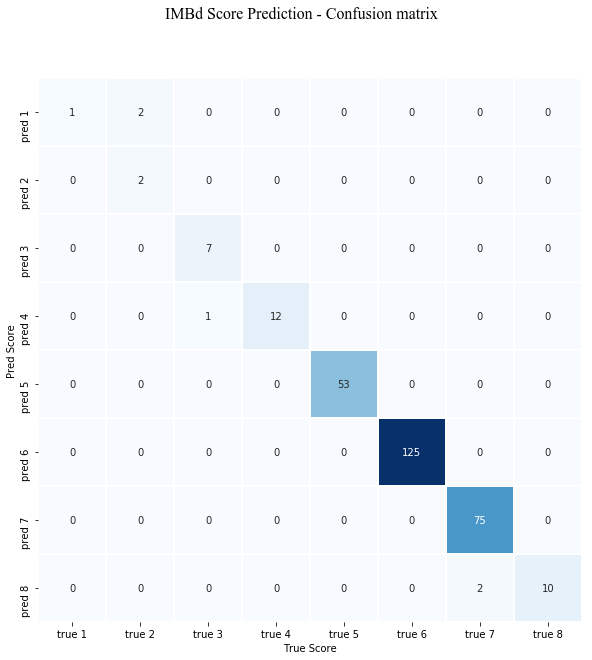

In [64]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('IMBd Score Prediction - Confusion matrix', **fontTitle)
fig.add_subplot(111)
sns.heatmap(dfCM, annot=True, square=True, cbar=False, fmt="d", linewidths=0.5,cmap='Blues')
plt.xlabel("True Score")
plt.ylabel("Pred Score")
plt.show()

In [65]:
print("Accuracy: ",accuracy_score(y_validation, y_validation_pred)*100)
print("Precision: ", precision_score(y_validation, y_validation_pred, average='macro')*100)
print("Recall: ", recall_score(y_validation, y_validation_pred, average='macro')*100)
print("F1: ", f1_score(y_validation, y_validation_pred, average='macro')*100)

Accuracy:  98.275862069
Precision:  88.6217948718
Recall:  91.8628246753
F1:  86.9491626794


# Teste final (a ser realizado apenas uma vez)

In [66]:
y_test_pred = clf.predict(X_test)

confm = confusion_matrix(y_validation, y_validation_pred)
confmT = confm.T

dfCM = pd.DataFrame(confmT)
dfCM.columns = ['true ' + str(val) for val in list(range(1,9))]
dfCM.index   = ['pred ' + str(val) for val in list(range(1,9))]

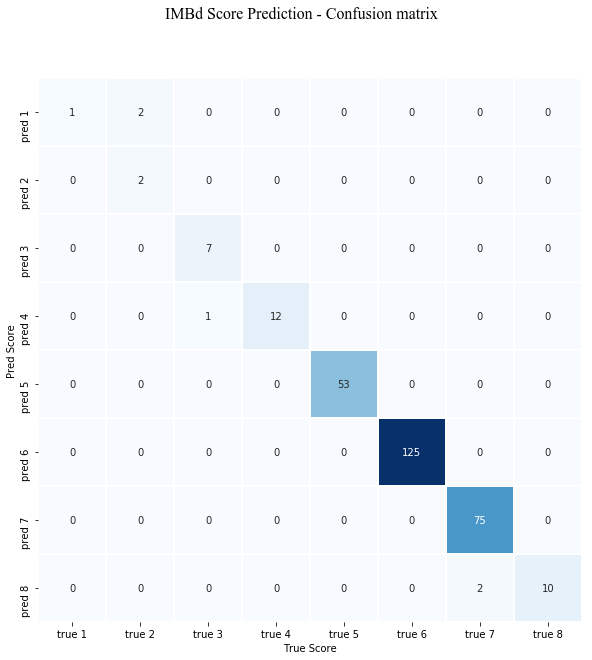

In [67]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('IMBd Score Prediction - Confusion matrix', **fontTitle)
fig.add_subplot(111)
sns.heatmap(dfCM, annot=True, square=True, cbar=False, fmt="d", linewidths=0.5,cmap='Blues')
plt.xlabel("True Score")
plt.ylabel("Pred Score")
plt.show()

In [68]:
print("Accuracy: ",accuracy_score(y_test, y_test_pred)*100)
print("Precision: ", precision_score(y_test, y_test_pred, average='macro')*100)
print("Recall: ", recall_score(y_test, y_test_pred, average='macro')*100)
print("F1: ", f1_score(y_test, y_test_pred, average='macro')*100)

Accuracy:  99.3103448276
Precision:  87.1951219512
Recall:  86.8421052632
F1:  87.0078411745


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
